<a href="https://colab.research.google.com/github/AureaCA/QuemadurasRN/blob/main/ProyectoFinal_webcam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### CREACION Y TESTEO DE LA RED

In [ ]:
#Para cargar datos desde el drive
from google.colab import drive
drive.mount('/content/drive')

# TensorFlow y tf.keras
import tensorflow as tf
from tensorflow import keras

# Librerias de ayuda
import numpy as np
import matplotlib.pyplot as plt

#Libreria de imagenes
import cv2 as cv
from google.colab.patches import cv2_imshow

Mounted at /content/drive


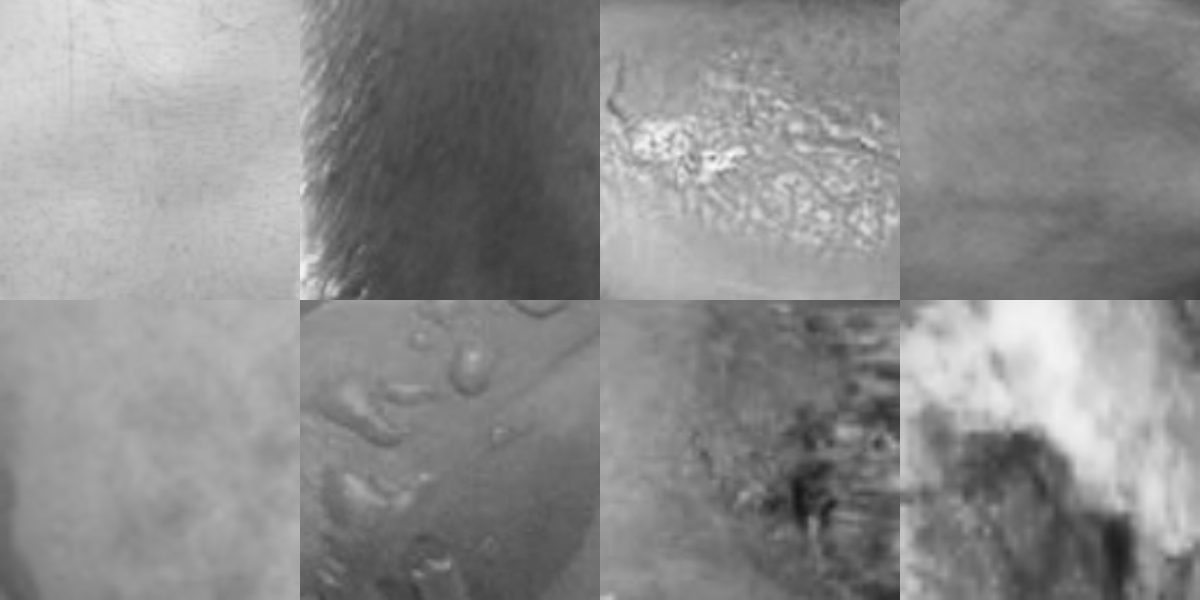

In [ ]:
#Quemaduras de primer grado
G1_1 = np.uint8(cv.imread("/content/drive/MyDrive/Quemaduras2/train/G1_1.PNG",0))
G1_2 = np.uint8(cv.imread("/content/drive/MyDrive/Quemaduras2/train/G1_2.PNG",0))

#Quemaduras de segundo grado
G2_1 = np.uint8(cv.imread("/content/drive/MyDrive/Quemaduras2/train/G2_1.PNG",0))
G2_2 = np.uint8(cv.imread("/content/drive/MyDrive/Quemaduras2/train/G2_2.PNG",0))

#Quemaduras de segundo grado prfunda
G2p_1 = np.uint8(cv.imread("/content/drive/MyDrive/Quemaduras2/train/G2p_1.PNG",0))
G2p_2 = np.uint8(cv.imread("/content/drive/MyDrive/Quemaduras2/train/G2p_2.PNG",0))

#Quemaduras de tercer grado
G3_1 = np.uint8(cv.imread("/content/drive/MyDrive/Quemaduras2/train/G3_1.PNG",0))
G3_2 = np.uint8(cv.imread("/content/drive/MyDrive/Quemaduras2/train/G3_2.PNG",0))

#Redimencionamos las imagenes
TRen = 300
TCol = 300
G1_1=cv.resize(G1_1,(TRen,TCol))
G1_2=cv.resize(G1_2,(TRen,TCol))
G2_1=cv.resize(G2_1,(TRen,TCol))
G2_2=cv.resize(G2_2,(TRen,TCol))
G2p_1=cv.resize(G2p_1,(TRen,TCol))
G2p_2=cv.resize(G2p_2,(TRen,TCol))
G3_1=cv.resize(G3_1,(TRen,TCol))
G3_2=cv.resize(G3_2,(TRen,TCol))

#Generamos un vector de etiquetas para identificar cada imagen
etiquetas = np.uint8([0,0,1,1,2,2,3,3])

#Movemos todas las imagenes a un solo arreglo
Img = np.uint8([G1_1,G1_2,G2_1,G2_2,G2p_1,G2p_2,G3_1,G3_2])

#Concatenamos las imagenes para mostrarlas
ImgCon1 = np.concatenate((G1_1,G1_2,G2_1,G2_2),axis=1)
ImgCon2 = np.concatenate((G2p_1,G2p_2,G3_1,G3_2),axis=1)
ImgCon = np.concatenate((ImgCon1,ImgCon2),axis=0)
#ImgCon = np.concatenate((G1_1,G1_2,G2_1,G2_2,G2p_1,G2p_2,G3_1,G3_2),axis=0)

#Mostramos las imagenes
cv2_imshow(ImgCon)

In [ ]:
#Declaramos el modelo con 2000 neuronas de entradacon una funcion de activacion de
#tipo ReLu y 1000 capas ocultas con funcion de tipo SoftMax
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(TRen,TCol)),
    keras.layers.Dense(2000, activation='relu'),
    keras.layers.Dense(1000, activation='softmax')
])

#Declaramos algunos parametros para la computacion
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
#Entrenamos la red neuronal
model.fit(np.array(Img), np.array(etiquetas), epochs=40)

Epoch 1/40
1/1 [==============================] - 1s 1s/step - loss: 2659.2754 - accuracy: 0.6250
Epoch 2/40
1/1 [==============================] - 1s 994ms/step - loss: 3786.6885 - accuracy: 0.7500
Epoch 3/40
1/1 [==============================] - 1s 994ms/step - loss: 6068.6484 - accuracy: 0.6250
Epoch 4/40
1/1 [==============================] - 1s 985ms/step - loss: 4052.3662 - accuracy: 0.6250
Epoch 5/40
1/1 [==============================] - 1s 1s/step - loss: 2280.8271 - accuracy: 0.6250
Epoch 6/40
1/1 [==============================] - 1s 1s/step - loss: 2901.0850 - accuracy: 0.6250
Epoch 7/40
1/1 [==============================] - 1s 997ms/step - loss: 942.5840 - accuracy: 0.7500
Epoch 8/40
1/1 [==============================] - 1s 1s/step - loss: 1821.9814 - accuracy: 0.6250
Epoch 9/40
1/1 [==============================] - 1s 982ms/step - loss: 2500.1846 - accuracy: 0.7500
Epoch 10/40
1/1 [==============================] - 1s 984ms/step - loss: 1893.1904 - accuracy: 0.8750
Ep

In [ ]:
#Testeamos la red con las imagenes de entrenamiento
test_loss, test_acc = model.evaluate(np.array(Img),  np.array(etiquetas), verbose=2)

print('\nTest accuracy:', test_acc)

1/1 - 0s - loss: 250.5137 - accuracy: 0.8750 - 353ms/epoch - 353ms/step

Test accuracy: 0.875


### PRUEBA CON OTRAS IMAGENES

In [ ]:
#Quemaduras de primer grado
G1_3 = np.uint8(cv.imread("/content/drive/MyDrive/Quemaduras2/test/G1_3.PNG",0))
G1_4 = np.uint8(cv.imread("/content/drive/MyDrive/Quemaduras2/test/G1_4.PNG",0))

#Quemaduras de segundo grado
G2_3 = np.uint8(cv.imread("/content/drive/MyDrive/Quemaduras2/test/G2_3.PNG",0))
G2_4 = np.uint8(cv.imread("/content/drive/MyDrive/Quemaduras2/test/G2_4.PNG",0))
G2_5 = np.uint8(cv.imread("/content/drive/MyDrive/Quemaduras2/test/G2_5.PNG",0))

#Quemaduras de segundo grado prfunda
G2p_3 = np.uint8(cv.imread("/content/drive/MyDrive/Quemaduras2/test/G2p_3.PNG",0))

#Quemaduras de tercer grado
G3_3 = np.uint8(cv.imread("/content/drive/MyDrive/Quemaduras2/test/G3_3.PNG",0))
G3_4 = np.uint8(cv.imread("/content/drive/MyDrive/Quemaduras2/test/G3_4.PNG",0))

#Redimencionamos las imagenes
G1_3=cv.resize(G1_3,(TRen,TCol))
G1_4=cv.resize(G1_4,(TRen,TCol))
G2_3=cv.resize(G2_3,(TRen,TCol))
G2_4=cv.resize(G2_4,(TRen,TCol))
G2_5=cv.resize(G2_5,(TRen,TCol))
G2p_3=cv.resize(G2p_3,(TRen,TCol))
G3_3=cv.resize(G3_3,(TRen,TCol))
G3_4=cv.resize(G3_4,(TRen,TCol))

#Movemos todas las imagenes a un solo arreglo
ImgTest = np.uint8([G1_3,G1_4,G2_3,G2_4,G2_5,G2p_3,G3_3,G3_4])

#Concatenamos las imagenes para mostrarlas
ImgTestCon1 = np.concatenate((G1_3,G1_4,G2_3,G2_4),axis=1)
ImgTestCon2 = np.concatenate((G2_5,G2p_3,G3_3,G3_4),axis=1)
ImgTestCon = np.concatenate((ImgTestCon1,ImgTestCon2),axis=0)
#ImgTestCon = np.concatenate((G1_3,G1_4,G2_3,G2_4,G2_5,G2p_3,G3_3,G3_4),axis=1)

#Mostramos las imagenes
cv2_imshow(ImgTestCon)

TypeError: ignored

In [ ]:
#Probamos la red con las nuevas imagenes
ImgTestP=model.predict(np.array(ImgTest))

1/1 [==============================] - 0s 345ms/step


In [ ]:
#Mostramos los resultados
print(ImgTestP)

[[0.         0.99999994 0.         ... 0.         0.         0.        ]
 [0.         0.99999994 0.         ... 0.         0.         0.        ]
 [0.         0.         0.99999994 ... 0.         0.         0.        ]
 ...
 [0.         0.99999994 0.         ... 0.         0.         0.        ]
 [0.         0.99999994 0.         ... 0.         0.         0.        ]
 [0.         0.99999994 0.         ... 0.         0.         0.        ]]


### USANDO WEBCAM

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='Fotografia.PNG', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({
                                                                video: { width: 300, height: 300 }
                                                                });

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/png', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

### PROBANDO LA FOTOGRAFIA EN LA RED NEURONAL

In [ ]:
#Cargamos la imagen a una variable
Foto = np.uint8(cv.imread("/content/Fotografia.PNG",0))

#Probamos la red con la fotografia
FotoTest = model.predict(np.array(Foto))

#Mostramos los resultados
print(FotoTest)